# Bike Sharing Prediction using Linear Regression

## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Target
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

## Conclusion guidelines
Explain how exactly demand vary with different features based on business and management point of view.

## Dataset characteristics
### day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Importing Libraries

In [58]:
# Loading Libraries
## Data Manipulation
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading data and presenting the data

In [59]:
# Loading Data
bike_data = pd.read_csv('day.csv')
# First 5 rows of the data
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Setting display parameters and style

In [60]:
# Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seaonrn
sns.set_style("whitegrid", {'axes.grid' : False})

### Basic information about the data

In [61]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',bike_data.shape[1])
print('Number of Rows:',bike_data.shape[0])
## Number of missing values
print('Number of missing values:',bike_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',bike_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',bike_data.duplicated().sum())

Number of Columns: 16
Number of Rows: 730
Number of missing values: 0
Number of unique values: 5900
Number of duplicates: 0


In [62]:
# Basic infomation about the dataframe
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [63]:
# Describing the dataframe
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [64]:
# Columns in the dataframe
print(bike_data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


### Checking for null values

In [65]:
# Checking for null values
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###### Outlier removal is not needed as the model will be min-max scaled, which will handle the outliers.

### Removing the irrelevant features

In [66]:
# Removing 'instant' column as duplicate of index of dataframe and no significance to output
bike_data.drop(['instant'],axis=1,inplace=True)
# Removing 'casual' and 'registered' columns as they are reduntant, similar to cnt column
bike_data.drop(['casual','registered'],axis=1,inplace=True)
# First 5 rows of the data
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Column wise correction and deriving new features

In [67]:
# Data types of columns
bike_data.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [68]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [69]:
# 'dteday' column
## Convert 'dteday' column to datetime format
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'],dayfirst=True)
## Deriving "days since the data started"
bike_data['days_from_start'] = (bike_data.dteday - pd.to_datetime('2018-01-01',format='%Y-%m-%d')).dt.days
## Removing 'dteday' column
bike_data.drop(['dteday'],axis=1,inplace=True)

In [70]:
# 'season' column
## Converting 'season' column to categorical
bike_data.season = bike_data.season.astype('str').map({'1':'spring', '2':'summer', '3':'fall', '4':'winter'})

In [71]:
# 'yr' column
## No need for correction as it is already in the correct format

In [72]:
# 'mnth' column
## Converting 'mnth' column to string name of the month
bike_data.mnth = bike_data.mnth.astype('str').map({'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul', '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'})

In [73]:
# 'holiday' column
## No need for correction as it is already in the correct format

In [74]:
# 'weekday' column
## Converting 'weekday' column to string name of the day
bike_data.weekday = bike_data.weekday.astype('str').map({'1':'Mon', '2':'Tue', '3':'Wed', '4':'Thu', '5':'Fri', '6':'Sat', '0':'Sun'})

## Deriving 'weekend' column
bike_data['weekend'] = bike_data.weekday.map({'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':1, 'Sun':1})

In [75]:
# 'workingday' column
## No need for correction as it is already in the correct format

In [76]:
# 'weathersit' column
## Converting 'weathersit' column to sting name of the weather situation
	# + weathersit : 
	# 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	# 	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	# 	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	# 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike_data.weathersit = bike_data.weathersit.astype('str').map({'1':'Clear', '2':'Cloudy', '3':'Rainy', '4':'Storm'})

In [77]:
# 'temp','atemp','hum','windspeed' columns
## Rounding the values of 'temp','atemp','hum','windspeed' columns to 3 decimal places
bike_data[['temp','atemp','hum','windspeed']] = bike_data[['temp','atemp','hum','windspeed']].round(3)

In [78]:
# Final dataframe after correction and deriving new columns
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_from_start,weekend
0,spring,0,Jan,0,Sat,0,Cloudy,14.111,18.181,80.583,10.750,985,0,1
1,spring,0,Jan,0,Sun,0,Cloudy,14.903,17.687,69.609,16.652,801,1,1
2,spring,0,Jan,0,Mon,1,Clear,8.051,9.470,43.727,16.637,1349,2,0
3,spring,0,Jan,0,Tue,1,Clear,8.200,10.606,59.044,10.740,1562,3,0
4,spring,0,Jan,0,Wed,1,Clear,9.305,11.464,43.696,12.522,1600,4,0


### Visualizing the data

In [79]:
# Divideing the columns into categorical and numerical
## Numerical columns
num_cols=['temp','atemp','hum','windspeed']
## Categorical columns
cat_cols=['season','yr','mnth','holiday','weekday','weekend','workingday','weathersit']
## Date columns
date_cols=['days_from_start']
## Target column
target_col = ['cnt']

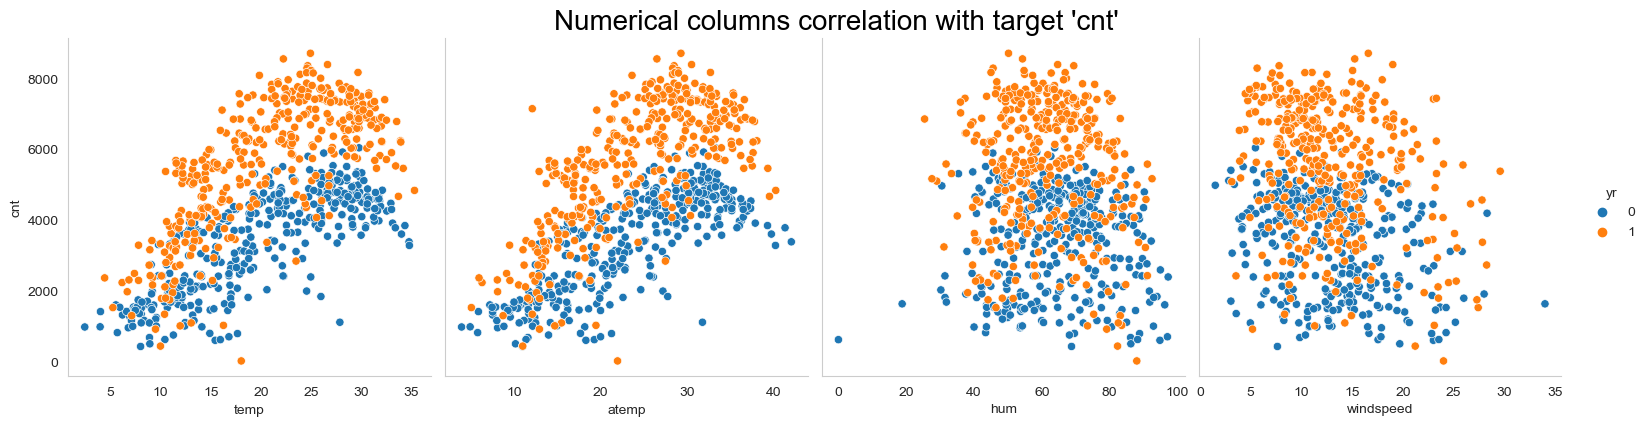

In [80]:
# Checking pairplot of Numerical columns for correlationq
sns.pairplot(data=bike_data,x_vars=num_cols,y_vars='cnt',diag_kind='kde',hue='yr',palette='tab10',size=4)
plt.title("Numerical columns correlation with target 'cnt'",fontsize=20,color='black',x=-1.0)
plt.show()

###### 'term' and 'atemp' are highly correlated with target whereas hum and winspeed are lowly correlated with target.

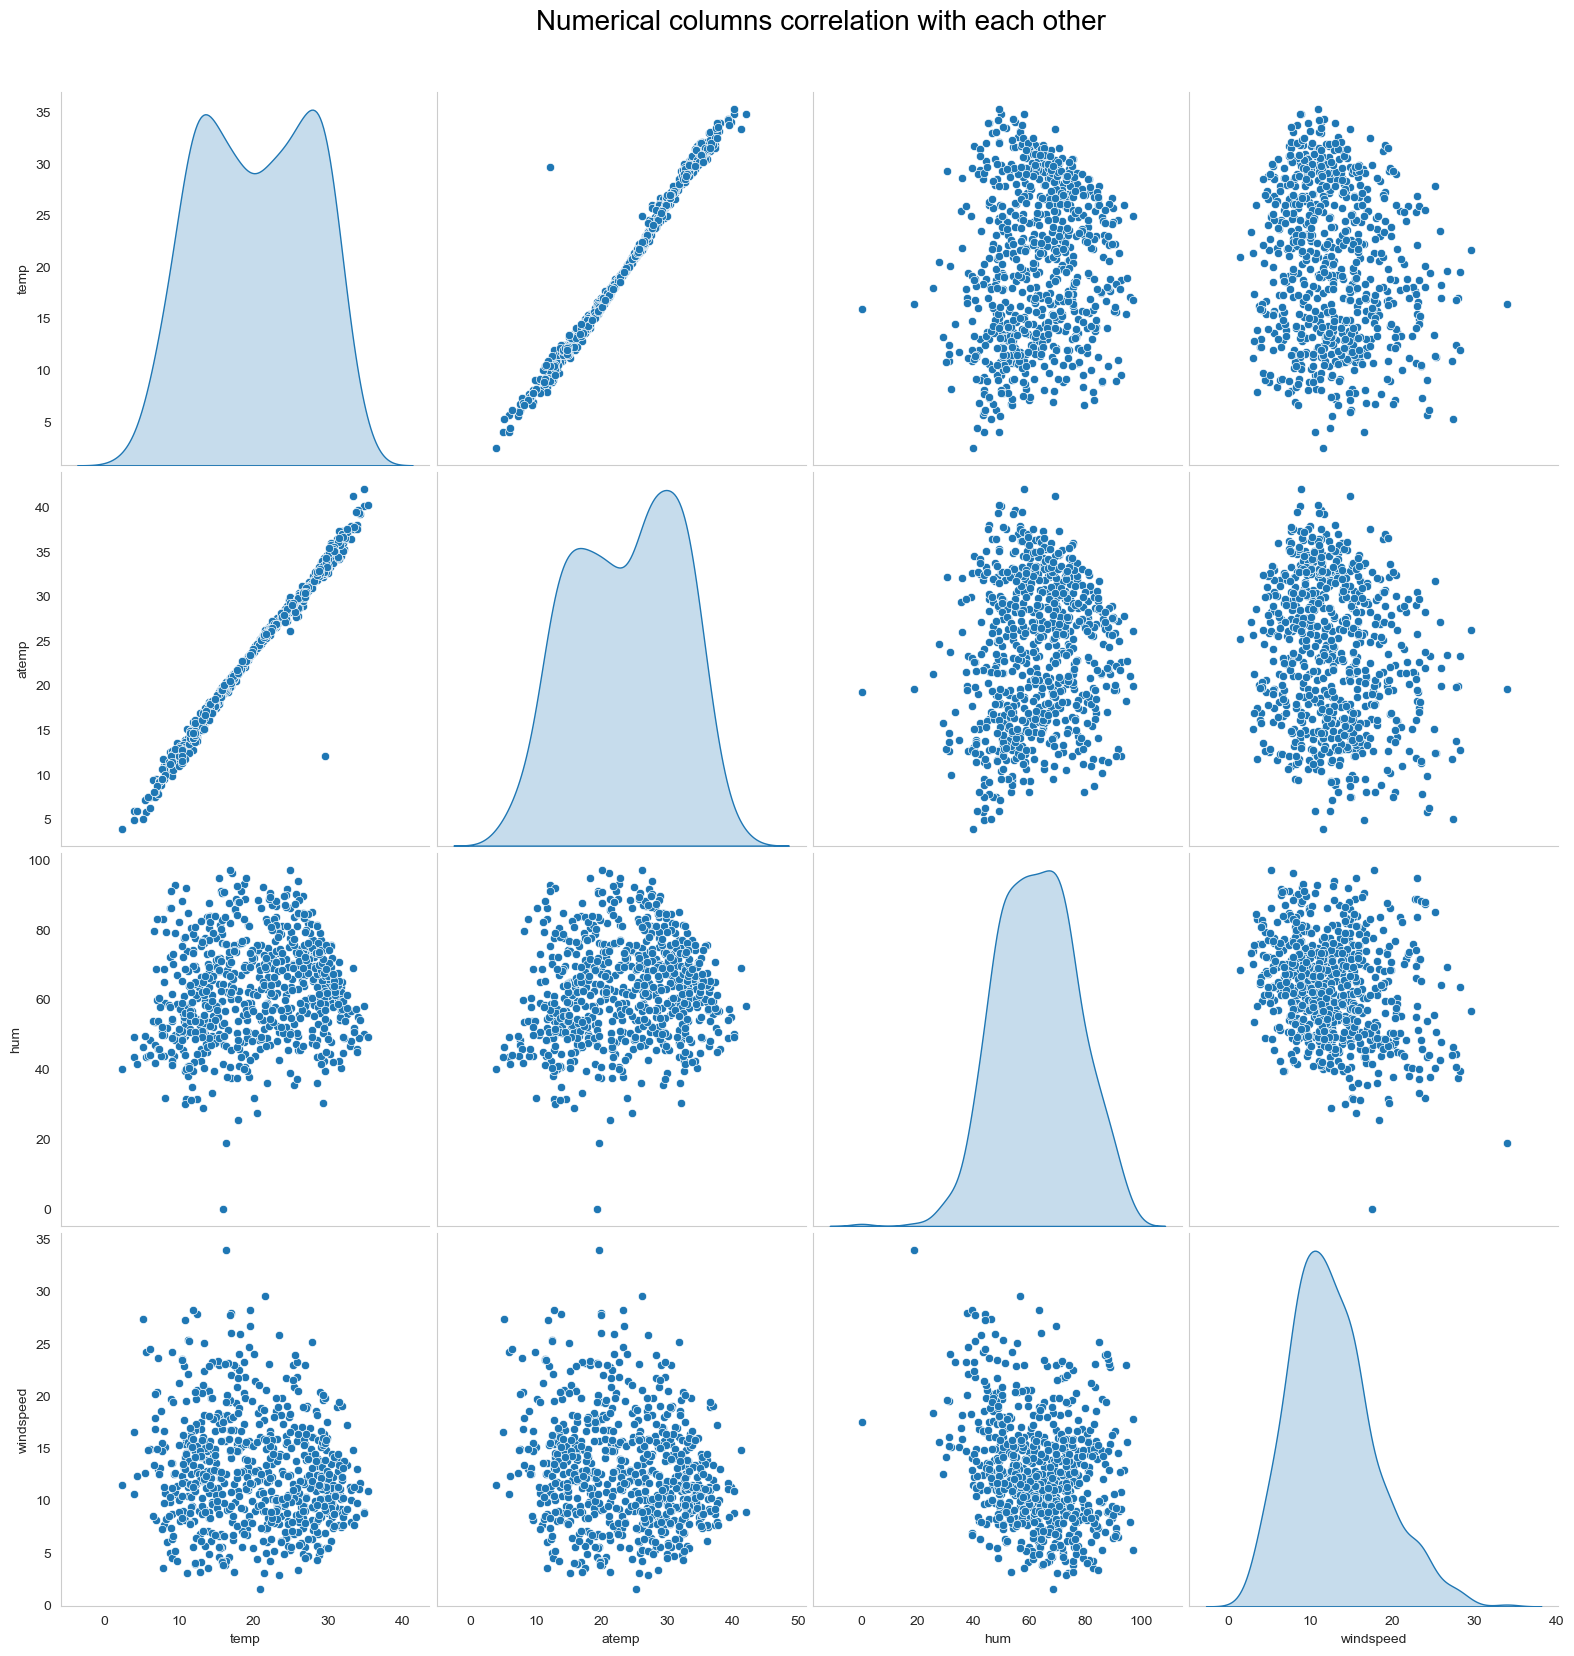

In [81]:
# Checking pairplot of Numerical columns to each other for correlation
sns.pairplot(data=bike_data,x_vars=num_cols,y_vars=num_cols,diag_kind='kde',palette='tab10',size=4)
plt.title("Numerical columns correlation with each other",fontsize=20,color='black',x=-1.0,y=4.2)
plt.show()

###### 'temp' and 'atemp' are highly correlated with each other and hence we can remove one of them during model building based on p-value and VIF. All Variable have distribution similar to normal distributions.

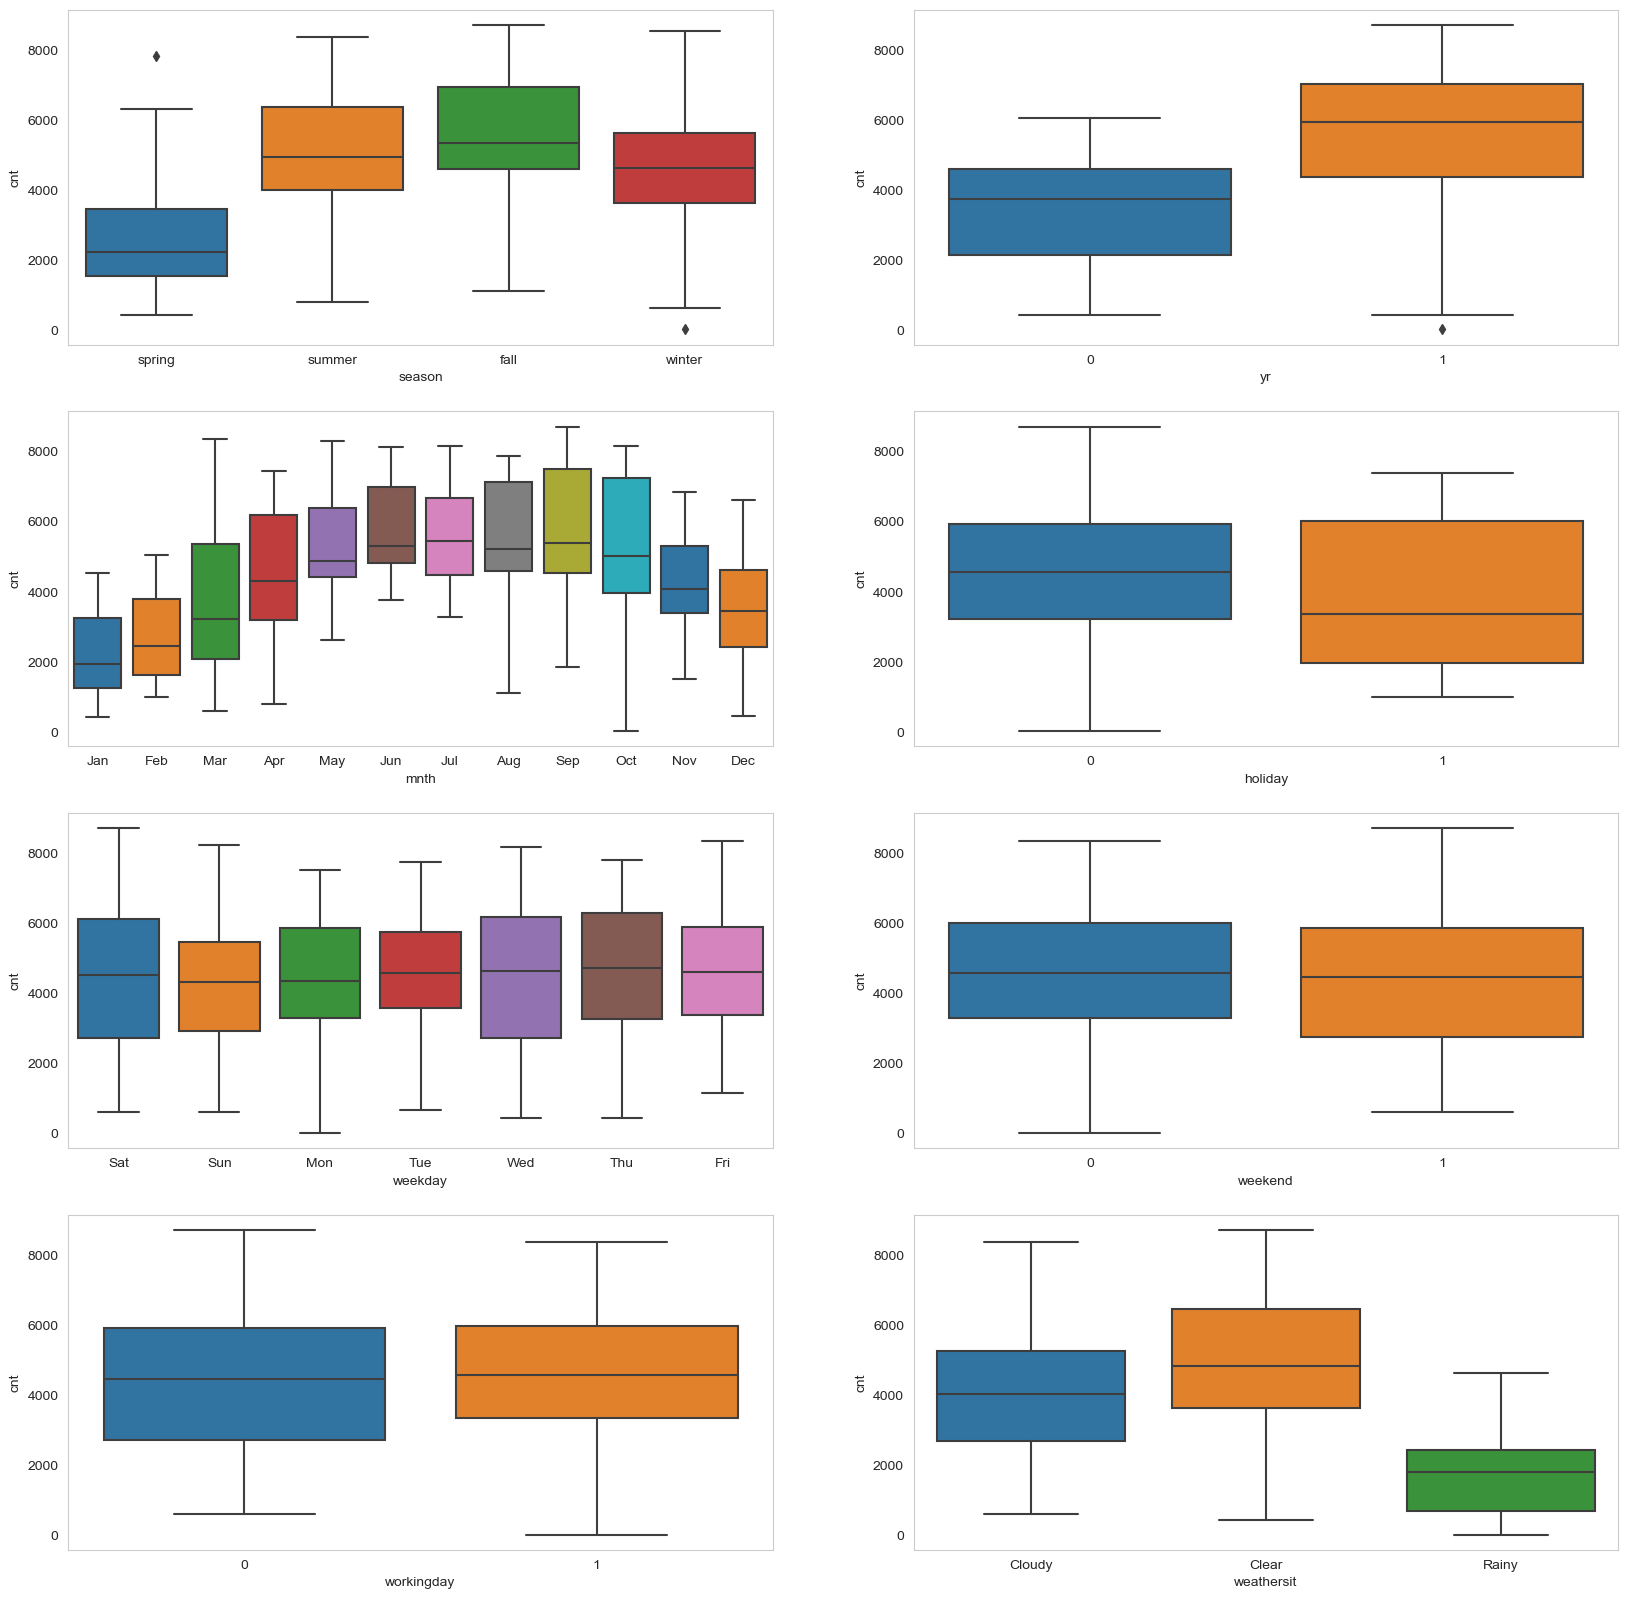

In [82]:
# Checking boxplot of Categories columns
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,2)
sns.boxplot(x='yr',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,3)
sns.boxplot(x='mnth',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,5)
sns.boxplot(x='weekday',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,6)
sns.boxplot(x='weekend',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,7)
sns.boxplot(x='workingday',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,8)
sns.boxplot(x='weathersit',y='cnt',data=bike_data,palette='tab10')
plt.show()

From the boxplot we can deriving information about correlation to target variable for each column:
 - season : We see large variation in target variable, indicating that season is a significant feature.
 - yr : We see large variation in target variable, indicating that yr is a significant feature.
 - mnth : We see large variation in target variable, indicating that mnth is a significant feature.
 - holiday : We see small variation in target variable, indicating that holiday is a not significant feature.
 - weekday : We see small variation in target variable, indicating that weekday is a not significant feature.
 - weekend : We see small variation in target variable, indicating that weekend is a not significant feature.
 - workingday : We see small variation in target variable, indicating that workingday is a not significant feature.
 - weathersit : We see large variation in target variable, indicating that weathersit is a significant feature.

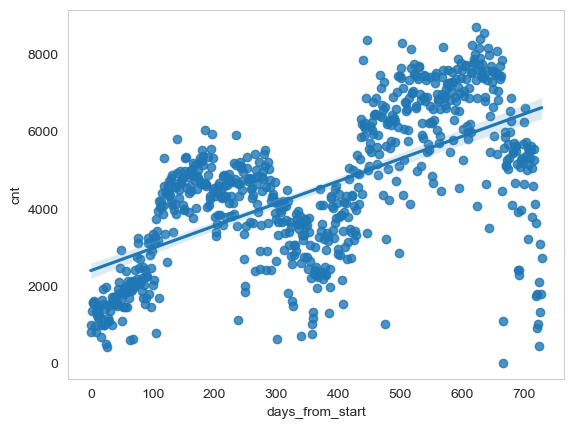

In [83]:
## Correlation between days_from_start and cnt
sns.regplot(x='days_from_start',y='cnt',data=bike_data)
plt.show()

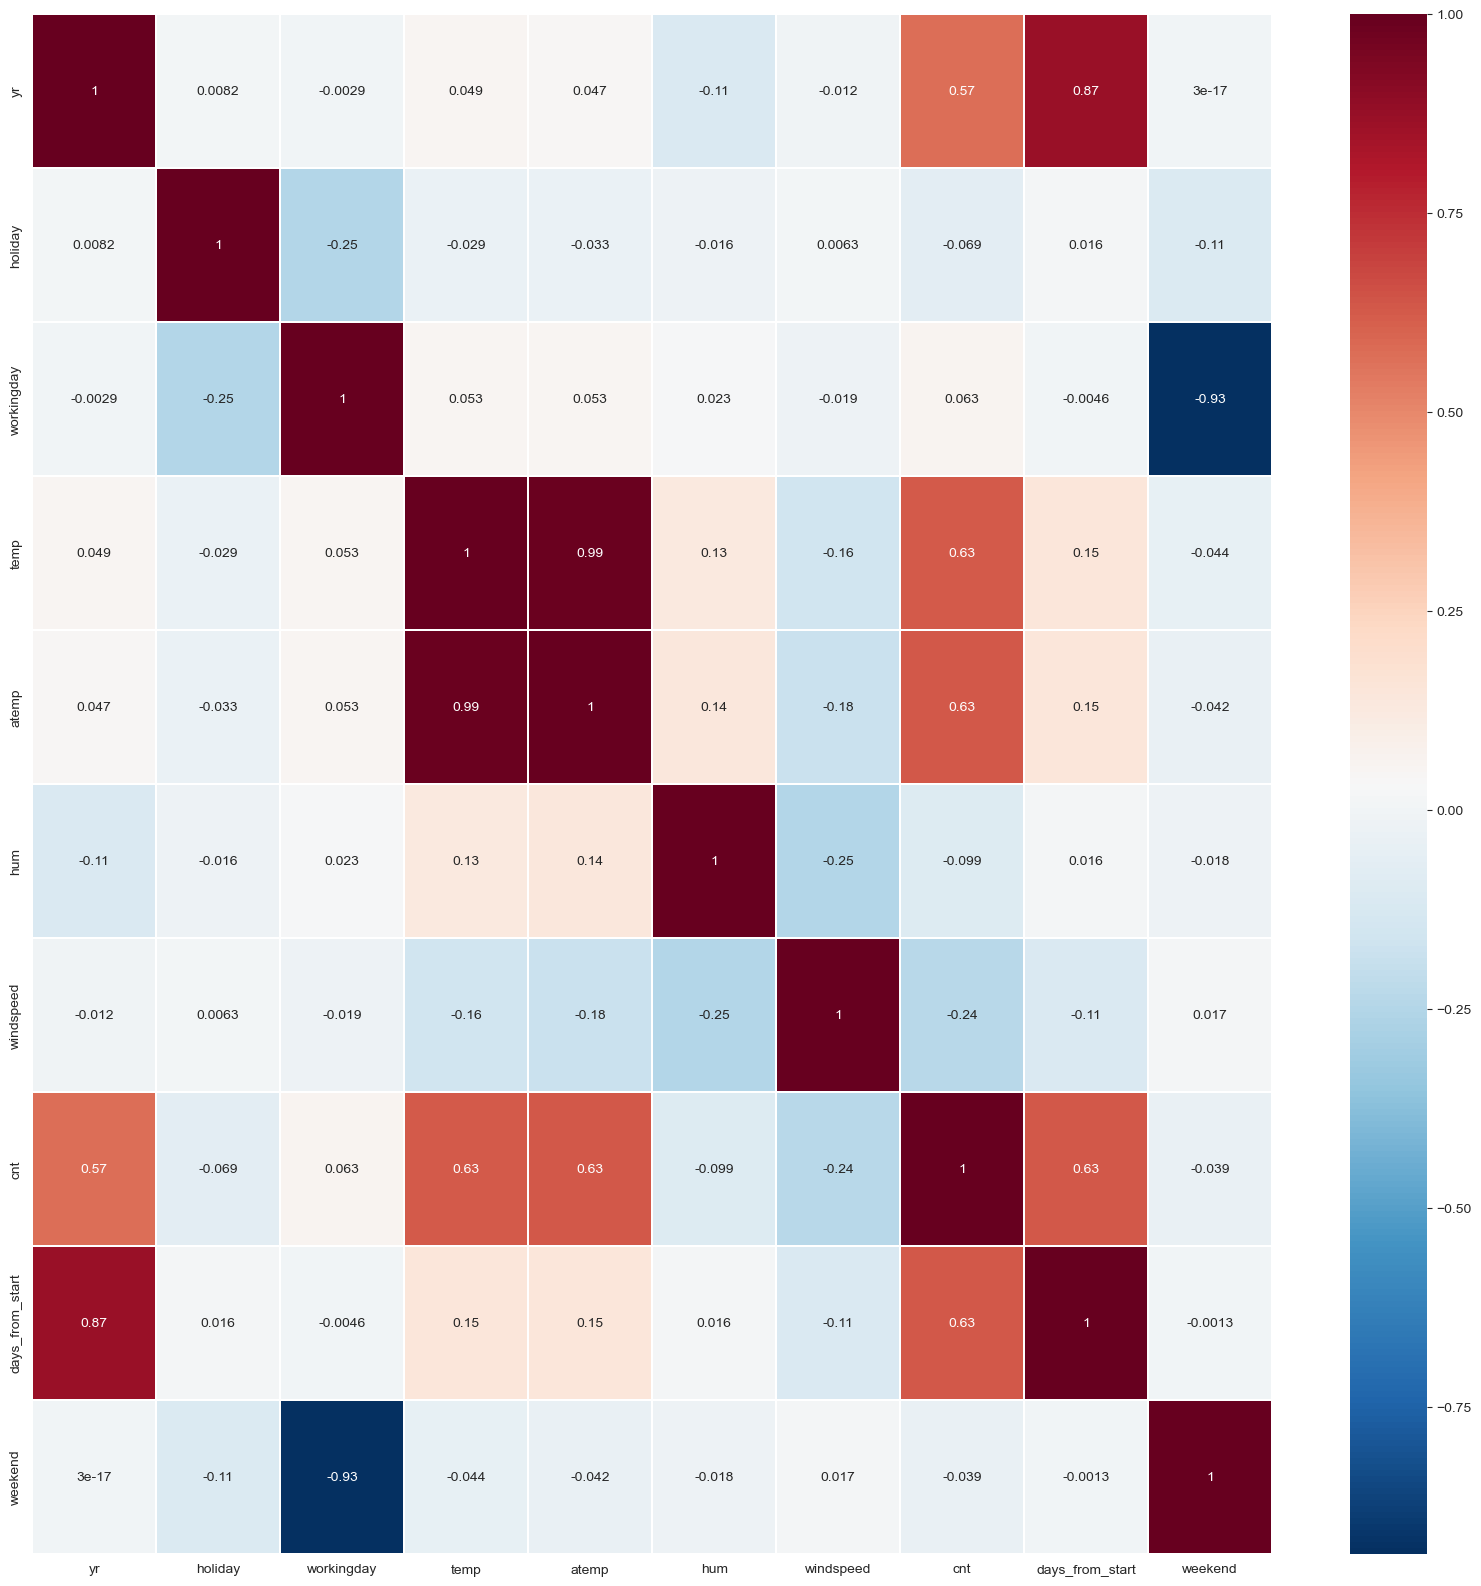

In [84]:
## Correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(bike_data.corr(),annot=True,cmap='RdBu_r',linewidths=0.2)
plt.show()

### Creating dummy variables for categorical variables

In [85]:
# First 5 rows of the data
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_from_start,weekend
0,spring,0,Jan,0,Sat,0,Cloudy,14.111,18.181,80.583,10.750,985,0,1
1,spring,0,Jan,0,Sun,0,Cloudy,14.903,17.687,69.609,16.652,801,1,1
2,spring,0,Jan,0,Mon,1,Clear,8.051,9.470,43.727,16.637,1349,2,0
3,spring,0,Jan,0,Tue,1,Clear,8.200,10.606,59.044,10.740,1562,3,0
4,spring,0,Jan,0,Wed,1,Clear,9.305,11.464,43.696,12.522,1600,4,0


In [86]:
# Dummy variables for 'season' column
bike_data = pd.get_dummies(bike_data,columns=['season'],drop_first=True)
# Dummy variables for 'mnth' column
bike_data = pd.get_dummies(bike_data,columns=['mnth'],drop_first=True)
# Dummy variables for 'weekday' column
bike_data = pd.get_dummies(bike_data,columns=['weekday'],drop_first=True)
# Dummy variables for 'weathersit' column
bike_data = pd.get_dummies(bike_data,columns=['weathersit'],drop_first=True)
# first 5 rows of the data
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,weekend,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
0,0,0,0,14.111,18.181,80.583,10.750,985,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.903,17.687,69.609,16.652,801,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.051,9.470,43.727,16.637,1349,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200,10.606,59.044,10.740,1562,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305,11.464,43.696,12.522,1600,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Splitting the data into training and test set

In [87]:
# settting seed for reproducibility
np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the train data set and test data set

In [88]:
# Scaling using MinMaxScaler
scaler = MinMaxScaler()
var_to_scale = ['temp', 'atemp', 'hum', 'windspeed','cnt','days_from_start']
df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])
df_test[var_to_scale] = scaler.transform(df_test[var_to_scale])

In [89]:
# Checking descriptive statistics of the data
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,weekend,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537273,0.512993,0.650367,0.320776,0.513620,0.505414,0.298039,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225843,0.212381,0.145882,0.169795,0.224593,0.288281,0.457846,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339860,0.332097,0.538640,0.199191,0.356420,0.255838,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540527,0.526817,0.653712,0.296782,0.518638,0.510989,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735230,0.688465,0.754830,0.414450,0.684710,0.759272,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
# Checking descriptive statistics of the data
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,weekend,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558951,0.532994,0.638506,0.313358,0.520592,0.488704,0.264840,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233699,0.217884,0.148973,0.159945,0.218435,0.293496,0.442259,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046590,0.025963,0.261918,-0.042803,0.048205,0.004121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354653,0.344757,0.527267,0.198534,0.377531,0.233516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558716,0.549197,0.627739,0.299461,0.524275,0.478022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759117,0.714139,0.743925,0.403051,0.672745,0.736951,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984440,0.980941,1.002143,0.807483,0.963300,1.001374,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing the train data set into X and Y sets

In [91]:
y_train = df_train.pop('cnt')
X_train = df_train

# Adding constant column to the data
X_train_const = sm.add_constant(X_train)

###### As the column count is 32 which is manageable we will proceed with model building and prune column based on p-value and VIF.

### Model building and pruning

In [92]:
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     96.33
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.10e-180
Time:                        15:36:54   Log-Likelihood:                 528.08
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     480   BIC:                            -869.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2306      0.047      4.952      0.000       0.139       0.322
yr                    0.2838      0.164      1.728      0.085      -0.039       0.607
holiday               0.0396      0.026      1.497      0.135      -0.012       0.092
workingday            0.1260      0.019      6.542      0.000       0.088       0.164
temp                  0.4031      0.142      2.828      0.005       0.123       0.683
atemp                 0.0485      0.139      0.350      0.727      -0.224       0.321
hum                  -0.1510      0.039     -3.906      0.000      -0.227      -0.075
windspeed            -0.1842      0.026     -6.987      0.000      -0.236      -0.132
days_from_start      -0.1029      0.327     -0.315      0.753      -0.745       0.540
weekend               0.0651      0.013      4.826      0.000       0.039       0.092
season_spring        -0.0491      0.030     -1.632      0.103      -0.108       0.010
season_summer         0.0383      0.026      1.458      0.146      -0.013       0.090
season_winter         0.1048      0.028      3.737      0.000       0.050       0.160
mnth_Aug              0.0336      0.065      0.515      0.607      -0.095       0.162
mnth_Dec             -0.0106      0.116     -0.091      0.928      -0.239       0.218
mnth_Feb             -0.0401      0.041     -0.967      0.334      -0.122       0.041
mnth_Jan             -0.0747      0.051     -1.461      0.145      -0.175       0.026
mnth_Jul             -0.0262      0.055     -0.480      0.631      -0.133       0.081
mnth_Jun              0.0071      0.038      0.189      0.850      -0.067       0.082
mnth_Mar             -0.0027      0.028     -0.098      0.922      -0.057       0.052
mnth_May              0.0288      0.025      1.158      0.247      -0.020       0.078
mnth_Nov             -0.0108      0.105     -0.102      0.918      -0.217       0.196
mnth_Oct              0.0346      0.093      0.373      0.709      -0.148       0.217
mnth_Sep              0.1035      0.076      1.360      0.175      -0.046       0.253
weekday_Mon          -0.0215      0.015     -1.392      0.164      -0.052       0.009
weekday_Sat           0.0599      0.010      6.042      0.000       0.040       0.079
weekday_Sun           0.0052      0.010      0.528      0.597      -0.014       0.025
weekday_Thu          -0.0098      0.016     -0.627      0.531      -0.040       0.021
weekday_Tue          -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_Wed          -0.0058      0.015     -0.387      0.699      -0.035       0.024
weathersit_Cloudy    -0.0614      0.011     -5.842      0.000      -0.082      -0.041
weathersit_Rainy     -0.2570      0.026     -9.708      0.000      -0.309      -0.205
=========================================================================

###### Despite R square been 85.3% which is significant, we have large p-values in the summary, we will remove the columns with p-value greater than 0.05 in iterative fashion, once they are lower than 0.05 we will take VIF as a secondary criterion.

###### First Step: Removing mnth_Dec with p-value 0.928.

In [93]:
# removing 'mnth_Dec' column
X_train_const.drop(columns=['mnth_Dec'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.98
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.06e-181
Time:                        15:38:17   Log-Likelihood:                 528.07
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2331      0.038      6.193      0.000       0.159       0.307
yr                    0.2981      0.048      6.201      0.000       0.204       0.393
holiday               0.0405      0.024      1.653      0.099      -0.008       0.089
workingday            0.1269      0.016      7.922      0.000       0.095       0.158
temp                  0.4039      0.142      2.843      0.005       0.125       0.683
atemp                 0.0479      0.138      0.346      0.729      -0.224       0.320
hum                  -0.1509      0.039     -3.909      0.000      -0.227      -0.075
windspeed            -0.1841      0.026     -6.995      0.000      -0.236      -0.132
days_from_start      -0.1314      0.095     -1.389      0.165      -0.317       0.054
weekend               0.0657      0.012      5.661      0.000       0.043       0.089
season_spring        -0.0493      0.030     -1.646      0.101      -0.108       0.010
season_summer         0.0386      0.026      1.484      0.138      -0.013       0.090
season_winter         0.1043      0.028      3.787      0.000       0.050       0.158
mnth_Aug              0.0388      0.031      1.234      0.218      -0.023       0.101
mnth_Feb             -0.0417      0.037     -1.115      0.266      -0.115       0.032
mnth_Jan             -0.0774      0.041     -1.879      0.061      -0.158       0.004
mnth_Jul             -0.0222      0.033     -0.675      0.500      -0.087       0.043
mnth_Jun              0.0098      0.025      0.398      0.691      -0.038       0.058
mnth_Mar             -0.0034      0.027     -0.129      0.898      -0.056       0.049
mnth_May              0.0301      0.021      1.462      0.145      -0.010       0.071
mnth_Nov             -0.0014      0.021     -0.068      0.946      -0.042       0.039
mnth_Oct              0.0428      0.022      1.960      0.051      -0.000       0.086
mnth_Sep              0.1100      0.027      4.076      0.000       0.057       0.163
weekday_Mon          -0.0215      0.015     -1.393      0.164      -0.052       0.009
weekday_Sat           0.0602      0.009      6.497      0.000       0.042       0.078
weekday_Sun           0.0055      0.009      0.595      0.552      -0.013       0.024
weekday_Thu          -0.0098      0.016     -0.629      0.529      -0.040       0.021
weekday_Tue          -0.0193      0.016     -1.243      0.214      -0.050       0.011
weekday_Wed          -0.0058      0.015     -0.388      0.698      -0.035       0.024
weathersit_Cloudy    -0.0614      0.010     -5.871      0.000      -0.082      -0.041
weathersit_Rainy     -0.2571      0.026     -9.722      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       83.599   Durbin-Watson:                   2.042
P

###### Next Step: Removing mnth_Nov with p-value 0.946.

In [94]:
# removing 'mnth_Nov' column
X_train_const.drop(columns=['mnth_Nov'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          7.84e-182
Time:                        15:39:06   Log-Likelihood:                 528.07
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2329      0.037      6.225      0.000       0.159       0.306
yr                    0.2981      0.048      6.207      0.000       0.204       0.392
holiday               0.0402      0.024      1.661      0.097      -0.007       0.088
workingday            0.1269      0.016      7.930      0.000       0.095       0.158
temp                  0.4036      0.142      2.845      0.005       0.125       0.682
atemp                 0.0479      0.138      0.347      0.729      -0.224       0.319
hum                  -0.1508      0.039     -3.913      0.000      -0.227      -0.075
windspeed            -0.1842      0.026     -7.024      0.000      -0.236      -0.133
days_from_start      -0.1313      0.094     -1.390      0.165      -0.317       0.054
weekend               0.0657      0.012      5.667      0.000       0.043       0.088
season_spring        -0.0490      0.030     -1.659      0.098      -0.107       0.009
season_summer         0.0390      0.026      1.523      0.128      -0.011       0.089
season_winter         0.1039      0.027      3.893      0.000       0.051       0.156
mnth_Aug              0.0392      0.031      1.272      0.204      -0.021       0.100
mnth_Feb             -0.0417      0.037     -1.115      0.265      -0.115       0.032
mnth_Jan             -0.0774      0.041     -1.881      0.061      -0.158       0.003
mnth_Jul             -0.0218      0.032     -0.675      0.500      -0.085       0.042
mnth_Jun              0.0100      0.024      0.411      0.681      -0.038       0.058
mnth_Mar             -0.0034      0.027     -0.127      0.899      -0.056       0.049
mnth_May              0.0302      0.021      1.469      0.143      -0.010       0.071
mnth_Oct              0.0436      0.018      2.399      0.017       0.008       0.079
mnth_Sep              0.1105      0.026      4.259      0.000       0.060       0.161
weekday_Mon          -0.0215      0.015     -1.394      0.164      -0.052       0.009
weekday_Sat           0.0602      0.009      6.504      0.000       0.042       0.078
weekday_Sun           0.0055      0.009      0.593      0.553      -0.013       0.024
weekday_Thu          -0.0099      0.016     -0.633      0.527      -0.040       0.021
weekday_Tue          -0.0194      0.016     -1.249      0.212      -0.050       0.011
weekday_Wed          -0.0058      0.015     -0.392      0.695      -0.035       0.023
weathersit_Cloudy    -0.0614      0.010     -5.879      0.000      -0.082      -0.041
weathersit_Rainy     -0.2571      0.026     -9.738      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       83.750   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.754
Skew:   

###### Next Step: Removing mnth_Mar with p-value 0.899.

In [95]:
# removing 'mnth_Mar' column
X_train_const.drop(columns=['mnth_Mar'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          7.52e-183
Time:                        15:39:58   Log-Likelihood:                 528.06
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2306      0.033      7.056      0.000       0.166       0.295
yr                    0.2939      0.035      8.456      0.000       0.226       0.362
holiday               0.0394      0.023      1.691      0.092      -0.006       0.085
workingday            0.1260      0.014      8.777      0.000       0.098       0.154
temp                  0.4041      0.142      2.852      0.005       0.126       0.682
atemp                 0.0485      0.138      0.352      0.725      -0.222       0.320
hum                  -0.1513      0.038     -3.951      0.000      -0.227      -0.076
windspeed            -0.1841      0.026     -7.033      0.000      -0.235      -0.133
days_from_start      -0.1229      0.067     -1.823      0.069      -0.255       0.010
weekend               0.0651      0.011      6.119      0.000       0.044       0.086
season_spring        -0.0501      0.028     -1.780      0.076      -0.105       0.005
season_summer         0.0396      0.025      1.587      0.113      -0.009       0.089
season_winter         0.1032      0.026      3.948      0.000       0.052       0.155
mnth_Aug              0.0392      0.031      1.274      0.203      -0.021       0.100
mnth_Feb             -0.0380      0.023     -1.633      0.103      -0.084       0.008
mnth_Jan             -0.0733      0.025     -2.954      0.003      -0.122      -0.025
mnth_Jul             -0.0215      0.032     -0.668      0.504      -0.085       0.042
mnth_Jun              0.0103      0.024      0.425      0.671      -0.037       0.058
mnth_May              0.0308      0.020      1.537      0.125      -0.009       0.070
mnth_Oct              0.0439      0.018      2.430      0.015       0.008       0.079
mnth_Sep              0.1105      0.026      4.262      0.000       0.060       0.161
weekday_Mon          -0.0215      0.015     -1.397      0.163      -0.052       0.009
weekday_Sat           0.0599      0.009      6.744      0.000       0.042       0.077
weekday_Sun           0.0053      0.009      0.580      0.562      -0.013       0.023
weekday_Thu          -0.0099      0.016     -0.640      0.523      -0.040       0.021
weekday_Tue          -0.0194      0.016     -1.250      0.212      -0.050       0.011
weekday_Wed          -0.0058      0.015     -0.393      0.695      -0.035       0.023
weathersit_Cloudy    -0.0614      0.010     -5.884      0.000      -0.082      -0.041
weathersit_Rainy     -0.2571      0.026     -9.747      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       83.914   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.627
Skew:                          -0.800   Prob(JB):                     3.06e-51
Kurtosis:      

###### Next Step: Removing atemp with p-value 0.725.

In [96]:
# removing 'atemp' column
X_train_const.drop(columns=['atemp'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          7.46e-184
Time:                        15:41:39   Log-Likelihood:                 528.00
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2302      0.033      7.054      0.000       0.166       0.294
yr                    0.2937      0.035      8.458      0.000       0.225       0.362
holiday               0.0388      0.023      1.670      0.096      -0.007       0.084
workingday            0.1260      0.014      8.785      0.000       0.098       0.154
temp                  0.4513      0.045      9.969      0.000       0.362       0.540
hum                  -0.1509      0.038     -3.945      0.000      -0.226      -0.076
windspeed            -0.1860      0.026     -7.284      0.000      -0.236      -0.136
days_from_start      -0.1226      0.067     -1.820      0.069      -0.255       0.010
weekend               0.0654      0.011      6.164      0.000       0.045       0.086
season_spring        -0.0498      0.028     -1.771      0.077      -0.105       0.005
season_summer         0.0402      0.025      1.612      0.108      -0.009       0.089
season_winter         0.1036      0.026      3.972      0.000       0.052       0.155
mnth_Aug              0.0377      0.030      1.238      0.216      -0.022       0.097
mnth_Feb             -0.0379      0.023     -1.630      0.104      -0.083       0.008
mnth_Jan             -0.0732      0.025     -2.955      0.003      -0.122      -0.025
mnth_Jul             -0.0225      0.032     -0.702      0.483      -0.085       0.040
mnth_Jun              0.0091      0.024      0.380      0.704      -0.038       0.056
mnth_May              0.0301      0.020      1.512      0.131      -0.009       0.069
mnth_Oct              0.0438      0.018      2.427      0.016       0.008       0.079
mnth_Sep              0.1098      0.026      4.252      0.000       0.059       0.161
weekday_Mon          -0.0209      0.015     -1.369      0.172      -0.051       0.009
weekday_Sat           0.0600      0.009      6.770      0.000       0.043       0.077
weekday_Sun           0.0054      0.009      0.595      0.552      -0.012       0.023
weekday_Thu          -0.0094      0.015     -0.611      0.541      -0.040       0.021
weekday_Tue          -0.0190      0.015     -1.229      0.220      -0.049       0.011
weekday_Wed          -0.0055      0.015     -0.372      0.710      -0.035       0.024
weathersit_Cloudy    -0.0614      0.010     -5.893      0.000      -0.082      -0.041
weathersit_Rainy     -0.2578      0.026     -9.813      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       83.292   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.261
Skew:                          -0.795   Prob(JB):                     9.99e-51
Kurtosis:                       5.882   Cond. No.                     1.26e+16
======================

###### Next Step: Removing weekday_Wed with p-value 0.710.

In [97]:
# removing 'weekday_Wed' column
X_train_const.drop(columns=['weekday_Wed'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          7.28e-185
Time:                        15:42:38   Log-Likelihood:                 527.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -900.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2290      0.032      7.059      0.000       0.165       0.293
yr                    0.2935      0.035      8.461      0.000       0.225       0.362
holiday               0.0377      0.023      1.638      0.102      -0.008       0.083
workingday            0.1247      0.014      8.981      0.000       0.097       0.152
temp                  0.4511      0.045      9.975      0.000       0.362       0.540
hum                  -0.1515      0.038     -3.968      0.000      -0.227      -0.076
windspeed            -0.1861      0.026     -7.292      0.000      -0.236      -0.136
days_from_start      -0.1223      0.067     -1.817      0.070      -0.255       0.010
weekend               0.0665      0.010      6.568      0.000       0.047       0.086
season_spring        -0.0499      0.028     -1.778      0.076      -0.105       0.005
season_summer         0.0400      0.025      1.608      0.108      -0.009       0.089
season_winter         0.1034      0.026      3.967      0.000       0.052       0.155
mnth_Aug              0.0377      0.030      1.239      0.216      -0.022       0.097
mnth_Feb             -0.0378      0.023     -1.628      0.104      -0.083       0.008
mnth_Jan             -0.0733      0.025     -2.959      0.003      -0.122      -0.025
mnth_Jul             -0.0223      0.032     -0.696      0.487      -0.085       0.041
mnth_Jun              0.0089      0.024      0.374      0.709      -0.038       0.056
mnth_May              0.0301      0.020      1.512      0.131      -0.009       0.069
mnth_Oct              0.0439      0.018      2.441      0.015       0.009       0.079
mnth_Sep              0.1097      0.026      4.251      0.000       0.059       0.160
weekday_Mon          -0.0179      0.013     -1.386      0.166      -0.043       0.007
weekday_Sat           0.0606      0.009      6.948      0.000       0.043       0.078
weekday_Sun           0.0060      0.009      0.670      0.503      -0.012       0.024
weekday_Thu          -0.0064      0.013     -0.488      0.626      -0.032       0.019
weekday_Tue          -0.0159      0.013     -1.218      0.224      -0.042       0.010
weathersit_Cloudy    -0.0612      0.010     -5.887      0.000      -0.082      -0.041
weathersit_Rainy     -0.2585      0.026     -9.871      0.000      -0.310      -0.207
==============================================================================
Omnibus:                       82.849   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.025
Skew:                          -0.791   Prob(JB):                     1.85e-50
Kurtosis:                       5.876   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors a

###### Next Step: Removing mnth_Jun with p-value 0.709.

In [98]:
# removing 'mnth_Jun' column
X_train_const.drop(columns=['mnth_Jun'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.96e-186
Time:                        15:43:22   Log-Likelihood:                 527.85
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2282      0.032      7.056      0.000       0.165       0.292
yr                    0.2906      0.034      8.593      0.000       0.224       0.357
holiday               0.0368      0.023      1.610      0.108      -0.008       0.082
workingday            0.1247      0.014      8.993      0.000       0.097       0.152
temp                  0.4610      0.037     12.560      0.000       0.389       0.533
hum                  -0.1535      0.038     -4.066      0.000      -0.228      -0.079
windspeed            -0.1871      0.025     -7.378      0.000      -0.237      -0.137
days_from_start      -0.1173      0.066     -1.780      0.076      -0.247       0.012
weekend               0.0667      0.010      6.588      0.000       0.047       0.087
season_spring        -0.0524      0.027     -1.923      0.055      -0.106       0.001
season_summer         0.0388      0.025      1.573      0.116      -0.010       0.087
season_winter         0.1002      0.025      4.075      0.000       0.052       0.148
mnth_Aug              0.0306      0.024      1.291      0.197      -0.016       0.077
mnth_Feb             -0.0361      0.023     -1.587      0.113      -0.081       0.009
mnth_Jan             -0.0707      0.024     -2.976      0.003      -0.117      -0.024
mnth_Jul             -0.0298      0.025     -1.200      0.231      -0.079       0.019
mnth_May              0.0265      0.017      1.524      0.128      -0.008       0.061
mnth_Oct              0.0425      0.018      2.420      0.016       0.008       0.077
mnth_Sep              0.1042      0.021      4.896      0.000       0.062       0.146
weekday_Mon          -0.0178      0.013     -1.379      0.169      -0.043       0.008
weekday_Sat           0.0606      0.009      6.964      0.000       0.044       0.078
weekday_Sun           0.0060      0.009      0.675      0.500      -0.011       0.024
weekday_Thu          -0.0065      0.013     -0.501      0.616      -0.032       0.019
weekday_Tue          -0.0161      0.013     -1.234      0.218      -0.042       0.010
weathersit_Cloudy    -0.0609      0.010     -5.880      0.000      -0.081      -0.041
weathersit_Rainy     -0.2582      0.026     -9.873      0.000      -0.310      -0.207
==============================================================================
Omnibus:                       82.010   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.119
Skew:                          -0.789   Prob(JB):                     3.55e-49
Kurtosis:                       5.831   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalles

###### Next Step: Removing weekday_Thu with p-value 0.616.

In [99]:
# removing 'weekday_Thu' column
X_train_const.drop(columns=['weekday_Thu'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.87e-187
Time:                        15:44:01   Log-Likelihood:                 527.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2266      0.032      7.047      0.000       0.163       0.290
yr                    0.2907      0.034      8.602      0.000       0.224       0.357
holiday               0.0354      0.023      1.560      0.119      -0.009       0.080
workingday            0.1238      0.014      9.014      0.000       0.097       0.151
temp                  0.4612      0.037     12.576      0.000       0.389       0.533
hum                  -0.1534      0.038     -4.066      0.000      -0.228      -0.079
windspeed            -0.1872      0.025     -7.388      0.000      -0.237      -0.137
days_from_start      -0.1175      0.066     -1.785      0.075      -0.247       0.012
weekend               0.0674      0.010      6.742      0.000       0.048       0.087
season_spring        -0.0522      0.027     -1.918      0.056      -0.106       0.001
season_summer         0.0391      0.025      1.588      0.113      -0.009       0.087
season_winter         0.1003      0.025      4.085      0.000       0.052       0.149
mnth_Aug              0.0308      0.024      1.304      0.193      -0.016       0.077
mnth_Feb             -0.0357      0.023     -1.571      0.117      -0.080       0.009
mnth_Jan             -0.0705      0.024     -2.972      0.003      -0.117      -0.024
mnth_Jul             -0.0294      0.025     -1.187      0.236      -0.078       0.019
mnth_May              0.0265      0.017      1.530      0.127      -0.008       0.061
mnth_Oct              0.0429      0.018      2.447      0.015       0.008       0.077
mnth_Sep              0.1044      0.021      4.907      0.000       0.063       0.146
weekday_Mon          -0.0156      0.012     -1.286      0.199      -0.040       0.008
weekday_Sat           0.0610      0.009      7.041      0.000       0.044       0.078
weekday_Sun           0.0064      0.009      0.719      0.472      -0.011       0.024
weekday_Tue          -0.0141      0.012     -1.135      0.257      -0.038       0.010
weathersit_Cloudy    -0.0607      0.010     -5.867      0.000      -0.081      -0.040
weathersit_Rainy     -0.2584      0.026     -9.888      0.000      -0.310      -0.207
==============================================================================
Omnibus:                       82.529   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.328
Skew:                          -0.792   Prob(JB):                     1.18e-49
Kurtosis:                       5.845   Cond. No.                     2.94e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-30. This might indicate that there are
strong multicollinearity 

###### Next Step: Removing weekday_Sun with p-value 0.472.

In [100]:
# removing 'weekday_Sun' column
X_train_const.drop(columns=['weekday_Sun'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.87e-187
Time:                        15:45:55   Log-Likelihood:                 527.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2282      0.033      6.907      0.000       0.163       0.293
yr                    0.2907      0.034      8.602      0.000       0.224       0.357
holiday               0.0338      0.023      1.482      0.139      -0.011       0.079
workingday            0.1222      0.013      9.475      0.000       0.097       0.148
temp                  0.4612      0.037     12.576      0.000       0.389       0.533
hum                  -0.1534      0.038     -4.066      0.000      -0.228      -0.079
windspeed            -0.1872      0.025     -7.388      0.000      -0.237      -0.137
days_from_start      -0.1175      0.066     -1.785      0.075      -0.247       0.012
weekend               0.0722      0.015      4.845      0.000       0.043       0.101
season_spring        -0.0522      0.027     -1.918      0.056      -0.106       0.001
season_summer         0.0391      0.025      1.588      0.113      -0.009       0.087
season_winter         0.1003      0.025      4.085      0.000       0.052       0.149
mnth_Aug              0.0308      0.024      1.304      0.193      -0.016       0.077
mnth_Feb             -0.0357      0.023     -1.571      0.117      -0.080       0.009
mnth_Jan             -0.0705      0.024     -2.972      0.003      -0.117      -0.024
mnth_Jul             -0.0294      0.025     -1.187      0.236      -0.078       0.019
mnth_May              0.0265      0.017      1.530      0.127      -0.008       0.061
mnth_Oct              0.0429      0.018      2.447      0.015       0.008       0.077
mnth_Sep              0.1044      0.021      4.907      0.000       0.063       0.146
weekday_Mon          -0.0156      0.012     -1.286      0.199      -0.040       0.008
weekday_Sat           0.0546      0.014      3.790      0.000       0.026       0.083
weekday_Tue          -0.0141      0.012     -1.135      0.257      -0.038       0.010
weathersit_Cloudy    -0.0607      0.010     -5.867      0.000      -0.081      -0.040
weathersit_Rainy     -0.2584      0.026     -9.888      0.000      -0.310      -0.207
==============================================================================
Omnibus:                       82.529   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.328
Skew:                          -0.792   Prob(JB):                     1.18e-49
Kurtosis:                       5.845   Cond. No.                     8.58e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###### Next Step: Removing weekday_Tue with p-value 0.257.

In [101]:
# removing 'weekday_Tue' column
X_train_const.drop(columns=['weekday_Tue'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.11e-187
Time:                        15:46:44   Log-Likelihood:                 527.04
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     488   BIC:                            -916.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2272      0.033      6.876      0.000       0.162       0.292
yr                    0.2892      0.034      8.561      0.000       0.223       0.356
holiday               0.0328      0.023      1.439      0.151      -0.012       0.078
workingday            0.1204      0.013      9.404      0.000       0.095       0.146
temp                  0.4615      0.037     12.582      0.000       0.389       0.534
hum                  -0.1549      0.038     -4.106      0.000      -0.229      -0.081
windspeed            -0.1878      0.025     -7.411      0.000      -0.238      -0.138
days_from_start      -0.1144      0.066     -1.739      0.083      -0.244       0.015
weekend               0.0739      0.015      4.986      0.000       0.045       0.103
season_spring        -0.0520      0.027     -1.909      0.057      -0.106       0.002
season_summer         0.0388      0.025      1.578      0.115      -0.010       0.087
season_winter         0.0993      0.025      4.044      0.000       0.051       0.148
mnth_Aug              0.0301      0.024      1.273      0.204      -0.016       0.077
mnth_Feb             -0.0365      0.023     -1.608      0.109      -0.081       0.008
mnth_Jan             -0.0701      0.024     -2.953      0.003      -0.117      -0.023
mnth_Jul             -0.0309      0.025     -1.246      0.213      -0.080       0.018
mnth_May              0.0261      0.017      1.503      0.134      -0.008       0.060
mnth_Oct              0.0424      0.018      2.423      0.016       0.008       0.077
mnth_Sep              0.1040      0.021      4.889      0.000       0.062       0.146
weekday_Mon          -0.0123      0.012     -1.045      0.297      -0.036       0.011
weekday_Sat           0.0545      0.014      3.777      0.000       0.026       0.083
weathersit_Cloudy    -0.0603      0.010     -5.833      0.000      -0.081      -0.040
weathersit_Rainy     -0.2566      0.026     -9.835      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       82.731   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.361
Skew:                          -0.786   Prob(JB):                     5.76e-51
Kurtosis:                       5.901   Cond. No.                     9.23e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###### Next Step: Removing holiday with p-value 0.310.

In [102]:
# removing 'holiday' column
X_train_const.drop(columns=['holiday'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.11e-187
Time:                        15:48:18   Log-Likelihood:                 527.04
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     488   BIC:                            -916.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2600      0.051      5.108      0.000       0.160       0.360
yr                    0.2892      0.034      8.561      0.000       0.223       0.356
workingday            0.0876      0.026      3.356      0.001       0.036       0.139
temp                  0.4615      0.037     12.582      0.000       0.389       0.534
hum                  -0.1549      0.038     -4.106      0.000      -0.229      -0.081
windspeed            -0.1878      0.025     -7.411      0.000      -0.238      -0.138
days_from_start      -0.1144      0.066     -1.739      0.083      -0.244       0.015
weekend               0.0411      0.028      1.453      0.147      -0.014       0.097
season_spring        -0.0520      0.027     -1.909      0.057      -0.106       0.002
season_summer         0.0388      0.025      1.578      0.115      -0.010       0.087
season_winter         0.0993      0.025      4.044      0.000       0.051       0.148
mnth_Aug              0.0301      0.024      1.273      0.204      -0.016       0.077
mnth_Feb             -0.0365      0.023     -1.608      0.109      -0.081       0.008
mnth_Jan             -0.0701      0.024     -2.953      0.003      -0.117      -0.023
mnth_Jul             -0.0309      0.025     -1.246      0.213      -0.080       0.018
mnth_May              0.0261      0.017      1.503      0.134      -0.008       0.060
mnth_Oct              0.0424      0.018      2.423      0.016       0.008       0.077
mnth_Sep              0.1040      0.021      4.889      0.000       0.062       0.146
weekday_Mon          -0.0123      0.012     -1.045      0.297      -0.036       0.011
weekday_Sat           0.0545      0.014      3.777      0.000       0.026       0.083
weathersit_Cloudy    -0.0603      0.010     -5.833      0.000      -0.081      -0.040
weathersit_Rainy     -0.2566      0.026     -9.835      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       82.731   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.361
Skew:                          -0.786   Prob(JB):                     5.76e-51
Kurtosis:                       5.901   Cond. No.                         39.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Next Step: Removing mnth_Jul with p-value 0.210.

In [104]:
# removing 'mnth_Jul' column
X_train_const.drop(columns=['mnth_Jul'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.99e-188
Time:                        15:49:24   Log-Likelihood:                 526.23
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2472      0.050      4.956      0.000       0.149       0.345
yr                    0.2868      0.034      8.500      0.000       0.221       0.353
workingday            0.0866      0.026      3.315      0.001       0.035       0.138
temp                  0.4517      0.036     12.602      0.000       0.381       0.522
hum                  -0.1546      0.038     -4.096      0.000      -0.229      -0.080
windspeed            -0.1875      0.025     -7.396      0.000      -0.237      -0.138
days_from_start      -0.1095      0.066     -1.666      0.096      -0.239       0.020
weekend               0.0396      0.028      1.402      0.162      -0.016       0.095
season_spring        -0.0355      0.024     -1.491      0.137      -0.082       0.011
season_summer         0.0572      0.020      2.904      0.004       0.019       0.096
season_winter         0.1131      0.022      5.161      0.000       0.070       0.156
mnth_Aug              0.0502      0.017      2.905      0.004       0.016       0.084
mnth_Feb             -0.0368      0.023     -1.620      0.106      -0.081       0.008
mnth_Jan             -0.0708      0.024     -2.984      0.003      -0.117      -0.024
mnth_May              0.0269      0.017      1.552      0.121      -0.007       0.061
mnth_Oct              0.0456      0.017      2.629      0.009       0.012       0.080
mnth_Sep              0.1198      0.017      7.003      0.000       0.086       0.153
weekday_Mon          -0.0125      0.012     -1.055      0.292      -0.036       0.011
weekday_Sat           0.0542      0.014      3.757      0.000       0.026       0.083
weathersit_Cloudy    -0.0606      0.010     -5.855      0.000      -0.081      -0.040
weathersit_Rainy     -0.2569      0.026     -9.843      0.000      -0.308      -0.206
==============================================================================
Omnibus:                       84.827   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.341
Skew:                          -0.804   Prob(JB):                     1.76e-52
Kurtosis:                       5.938   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# removing 'season_spring' column
X_train_const.drop(columns=['season_spring'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 10 May 2023   Prob (F-statistic):          4.84e-189
Time:                        15:50:11   Log-Likelihood:                 525.08
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2082      0.043      4.896      0.000       0.125       0.292
yr                    0.2725      0.032      8.414      0.000       0.209       0.336
workingday            0.0883      0.026      3.380      0.001       0.037       0.140
temp                  0.4858      0.028     17.607      0.000       0.432       0.540
hum                  -0.1626      0.037     -4.346      0.000      -0.236      -0.089
windspeed            -0.1913      0.025     -7.578      0.000      -0.241      -0.142
days_from_start      -0.0826      0.063     -1.305      0.193      -0.207       0.042
weekend               0.0418      0.028      1.478      0.140      -0.014       0.097
season_summer         0.0775      0.014      5.426      0.000       0.049       0.106
season_winter         0.1302      0.019      6.958      0.000       0.093       0.167
mnth_Aug              0.0579      0.017      3.507      0.000       0.025       0.090
mnth_Feb             -0.0404      0.023     -1.789      0.074      -0.085       0.004
mnth_Jan             -0.0709      0.024     -2.983      0.003      -0.118      -0.024
mnth_May              0.0233      0.017      1.355      0.176      -0.010       0.057
mnth_Oct              0.0435      0.017      2.515      0.012       0.010       0.078
mnth_Sep              0.1265      0.017      7.659      0.000       0.094       0.159
weekday_Mon          -0.0117      0.012     -0.992      0.322      -0.035       0.011
weekday_Sat           0.0534      0.014      3.702      0.000       0.025       0.082
weathersit_Cloudy    -0.0592      0.010     -5.741      0.000      -0.080      -0.039
weathersit_Rainy     -0.2528      0.026     -9.727      0.000      -0.304      -0.202
==============================================================================
Omnibus:                       78.780   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.720
Skew:                          -0.769   Prob(JB):                     7.84e-46
Kurtosis:                       5.722   Cond. No.                         35.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Next Step: Removing weekday_Mon with p-value 0.322.

In [106]:
# removing 'weekday_Mon' column
X_train_const.drop(columns=['weekday_Mon'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.22e-190
Time:                        15:51:04   Log-Likelihood:                 524.57
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2000      0.042      4.795      0.000       0.118       0.282
yr                    0.2718      0.032      8.394      0.000       0.208       0.335
workingday            0.0950      0.025      3.767      0.000       0.045       0.145
temp                  0.4864      0.028     17.632      0.000       0.432       0.541
hum                  -0.1642      0.037     -4.393      0.000      -0.238      -0.091
windspeed            -0.1914      0.025     -7.582      0.000      -0.241      -0.142
days_from_start      -0.0821      0.063     -1.297      0.195      -0.206       0.042
weekend               0.0509      0.027      1.900      0.058      -0.002       0.103
season_summer         0.0771      0.014      5.399      0.000       0.049       0.105
season_winter         0.1300      0.019      6.948      0.000       0.093       0.167
mnth_Aug              0.0580      0.017      3.511      0.000       0.026       0.090
mnth_Feb             -0.0401      0.023     -1.775      0.076      -0.085       0.004
mnth_Jan             -0.0710      0.024     -2.986      0.003      -0.118      -0.024
mnth_May              0.0241      0.017      1.401      0.162      -0.010       0.058
mnth_Oct              0.0431      0.017      2.491      0.013       0.009       0.077
mnth_Sep              0.1268      0.017      7.675      0.000       0.094       0.159
weekday_Sat           0.0534      0.014      3.698      0.000       0.025       0.082
weathersit_Cloudy    -0.0591      0.010     -5.724      0.000      -0.079      -0.039
weathersit_Rainy     -0.2521      0.026     -9.707      0.000      -0.303      -0.201
==============================================================================
Omnibus:                       78.242   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.108
Skew:                          -0.762   Prob(JB):                     1.06e-45
Kurtosis:                       5.724   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Next Step: Removing days_from_start with p-value 0.195.

In [107]:
# removing 'days_from_start' column
X_train_const.drop(columns=['days_from_start'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.10e-190
Time:                        15:52:13   Log-Likelihood:                 523.69
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -935.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1808      0.039      4.634      0.000       0.104       0.257
yr                    0.2311      0.008     29.054      0.000       0.215       0.247
workingday            0.0971      0.025      3.854      0.000       0.048       0.147
temp                  0.4843      0.028     17.574      0.000       0.430       0.538
hum                  -0.1686      0.037     -4.528      0.000      -0.242      -0.095
windspeed            -0.1901      0.025     -7.530      0.000      -0.240      -0.140
weekend               0.0527      0.027      1.971      0.049       0.000       0.105
season_summer         0.0841      0.013      6.354      0.000       0.058       0.110
season_winter         0.1145      0.014      7.961      0.000       0.086       0.143
mnth_Aug              0.0534      0.016      3.308      0.001       0.022       0.085
mnth_Feb             -0.0256      0.020     -1.303      0.193      -0.064       0.013
mnth_Jan             -0.0531      0.019     -2.741      0.006      -0.091      -0.015
mnth_May              0.0228      0.017      1.331      0.184      -0.011       0.057
mnth_Oct              0.0466      0.017      2.721      0.007       0.013       0.080
mnth_Sep              0.1224      0.016      7.565      0.000       0.091       0.154
weekday_Sat           0.0533      0.014      3.689      0.000       0.025       0.082
weathersit_Cloudy    -0.0582      0.010     -5.651      0.000      -0.078      -0.038
weathersit_Rainy     -0.2508      0.026     -9.656      0.000      -0.302      -0.200
==============================================================================
Omnibus:                       80.323   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.289
Skew:                          -0.772   Prob(JB):                     2.41e-48
Kurtosis:                       5.817   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Next Step: Removing mnth_Feb with p-value 0.193.

In [108]:
# removing 'mnth_Feb' column
X_train_const.drop(columns=['mnth_Feb'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     175.0
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.90e-191
Time:                        15:52:56   Log-Likelihood:                 522.82
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     493   BIC:                            -939.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1652      0.037      4.446      0.000       0.092       0.238
yr                    0.2306      0.008     29.004      0.000       0.215       0.246
workingday            0.0988      0.025      3.925      0.000       0.049       0.148
temp                  0.5002      0.025     20.216      0.000       0.452       0.549
hum                  -0.1697      0.037     -4.556      0.000      -0.243      -0.097
windspeed            -0.1907      0.025     -7.550      0.000      -0.240      -0.141
weekend               0.0542      0.027      2.027      0.043       0.002       0.107
season_summer         0.0902      0.012      7.289      0.000       0.066       0.115
season_winter         0.1227      0.013      9.515      0.000       0.097       0.148
mnth_Aug              0.0555      0.016      3.454      0.001       0.024       0.087
mnth_Jan             -0.0415      0.017     -2.411      0.016      -0.075      -0.008
mnth_May              0.0213      0.017      1.243      0.214      -0.012       0.055
mnth_Oct              0.0449      0.017      2.629      0.009       0.011       0.078
mnth_Sep              0.1245      0.016      7.729      0.000       0.093       0.156
weekday_Sat           0.0540      0.014      3.739      0.000       0.026       0.082
weathersit_Cloudy    -0.0581      0.010     -5.635      0.000      -0.078      -0.038
weathersit_Rainy     -0.2501      0.026     -9.626      0.000      -0.301      -0.199
==============================================================================
Omnibus:                       76.377   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.731
Skew:                          -0.739   Prob(JB):                     2.12e-45
Kurtosis:                       5.738   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Next Step: Removing mnth_May with p-value 0.214.

In [109]:
# removing 'mnth_May' column
X_train_const.drop(columns=['mnth_May'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.94e-192
Time:                        15:53:36   Log-Likelihood:                 522.02
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     494   BIC:                            -944.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1598      0.037      4.328      0.000       0.087       0.232
yr                    0.2302      0.008     28.962      0.000       0.215       0.246
workingday            0.0993      0.025      3.943      0.000       0.050       0.149
temp                  0.5033      0.025     20.429      0.000       0.455       0.552
hum                  -0.1629      0.037     -4.418      0.000      -0.235      -0.090
windspeed            -0.1918      0.025     -7.595      0.000      -0.241      -0.142
weekend               0.0545      0.027      2.038      0.042       0.002       0.107
season_summer         0.0971      0.011      8.767      0.000       0.075       0.119
season_winter         0.1228      0.013      9.514      0.000       0.097       0.148
mnth_Aug              0.0541      0.016      3.373      0.001       0.023       0.086
mnth_Jan             -0.0407      0.017     -2.361      0.019      -0.075      -0.007
mnth_Oct              0.0442      0.017      2.590      0.010       0.011       0.078
mnth_Sep              0.1231      0.016      7.659      0.000       0.092       0.155
weekday_Sat           0.0537      0.014      3.713      0.000       0.025       0.082
weathersit_Cloudy    -0.0584      0.010     -5.657      0.000      -0.079      -0.038
weathersit_Rainy     -0.2524      0.026     -9.731      0.000      -0.303      -0.201
==============================================================================
Omnibus:                       75.024   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.818
Skew:                          -0.742   Prob(JB):                     1.35e-42
Kurtosis:                       5.622   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### The P-value of the columns are now less than 0.05, we will now take VIF as a secondary criterion. As we have removed high P-value, we will remove columns having p value close to 0.05 and high VIF.

In [110]:
vif = pd.DataFrame()
X=X_train_const.drop(columns=['const'])
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.07
1,workingday,16.11
2,temp,12.61
5,weekend,8.88
4,windspeed,4.35
7,season_winter,2.62
13,weathersit_Cloudy,2.23
12,weekday_Sat,2.11
0,yr,2.07
6,season_summer,1.96


###### We are removing 'weekend' as it has p-value close to 0.05 and high VIF.

In [111]:
# removing 'weekend' column
X_train_const.drop(columns=['weekend'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.61e-192
Time:                        15:56:08   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     495   BIC:                            -946.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2052      0.030      6.940      0.000       0.147       0.263
yr                    0.2304      0.008     28.895      0.000       0.215       0.246
workingday            0.0529      0.011      4.903      0.000       0.032       0.074
temp                  0.5043      0.025     20.412      0.000       0.456       0.553
hum                  -0.1619      0.037     -4.376      0.000      -0.235      -0.089
windspeed            -0.1927      0.025     -7.609      0.000      -0.242      -0.143
season_summer         0.0977      0.011      8.794      0.000       0.076       0.119
season_winter         0.1219      0.013      9.417      0.000       0.096       0.147
mnth_Aug              0.0544      0.016      3.383      0.001       0.023       0.086
mnth_Jan             -0.0414      0.017     -2.396      0.017      -0.075      -0.007
mnth_Oct              0.0455      0.017      2.658      0.008       0.012       0.079
mnth_Sep              0.1214      0.016      7.537      0.000       0.090       0.153
weekday_Sat           0.0619      0.014      4.447      0.000       0.035       0.089
weathersit_Cloudy    -0.0581      0.010     -5.613      0.000      -0.078      -0.038
weathersit_Rainy     -0.2517      0.026     -9.674      0.000      -0.303      -0.201
==============================================================================
Omnibus:                       80.623   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.342
Skew:                          -0.780   Prob(JB):                     1.05e-47
Kurtosis:                       5.783   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### No P-values is close to 0.05, we will now remove columns with VIF greater than 10.

In [112]:
# Calculating VIF values
vif = pd.DataFrame()
X=X_train_const.drop(columns=['const'])
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,19.40
2,temp,11.98
1,workingday,4.61
4,windspeed,3.78
6,season_winter,2.60
12,weathersit_Cloudy,2.15
0,yr,2.05
5,season_summer,1.96
11,weekday_Sat,1.81
9,mnth_Oct,1.62


###### We are removing 'Hum' as it has high VIF.

In [113]:
# removing 'hum' column
X_train_const.drop(columns=['hum'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.27e-189
Time:                        15:57:37   Log-Likelihood:                 510.20
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     496   BIC:                            -933.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1129      0.021      5.351      0.000       0.071       0.154
yr                    0.2341      0.008     29.006      0.000       0.218       0.250
workingday            0.0557      0.011      5.076      0.000       0.034       0.077
temp                  0.4815      0.025     19.582      0.000       0.433       0.530
windspeed            -0.1626      0.025     -6.552      0.000      -0.211      -0.114
season_summer         0.0938      0.011      8.320      0.000       0.072       0.116
season_winter         0.1125      0.013      8.660      0.000       0.087       0.138
mnth_Aug              0.0525      0.016      3.207      0.001       0.020       0.085
mnth_Jan             -0.0469      0.018     -2.671      0.008      -0.081      -0.012
mnth_Oct              0.0421      0.017      2.420      0.016       0.008       0.076
mnth_Sep              0.1148      0.016      7.035      0.000       0.083       0.147
weekday_Sat           0.0666      0.014      4.713      0.000       0.039       0.094
weathersit_Cloudy    -0.0839      0.009     -9.701      0.000      -0.101      -0.067
weathersit_Rainy     -0.2957      0.024    -12.101      0.000      -0.344      -0.248
==============================================================================
Omnibus:                       78.135   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.910
Skew:                          -0.761   Prob(JB):                     1.18e-45
Kurtosis:                       5.724   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Calculating VIF values
vif = pd.DataFrame()
X=X_train_const.drop(columns=['const'])
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.49
1,workingday,4.32
3,windspeed,3.61
5,season_winter,2.09
0,yr,2.05
4,season_summer,1.91
10,weekday_Sat,1.76
6,mnth_Aug,1.61
8,mnth_Oct,1.61
11,weathersit_Cloudy,1.57


###### We are removing 'workingday' as 'temp' and 'windspeed' features can be used in realtime and hold high business value.

In [115]:
# removing 'workingday' column
X_train_const.drop(columns=['workingday'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     208.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.32e-185
Time:                        15:58:40   Log-Likelihood:                 497.29
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     497   BIC:                            -913.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1548      0.020      7.773      0.000       0.116       0.194
yr                    0.2346      0.008     28.369      0.000       0.218       0.251
temp                  0.4840      0.025     19.216      0.000       0.435       0.533
windspeed            -0.1643      0.025     -6.463      0.000      -0.214      -0.114
season_summer         0.0956      0.012      8.287      0.000       0.073       0.118
season_winter         0.1115      0.013      8.378      0.000       0.085       0.138
mnth_Aug              0.0559      0.017      3.336      0.001       0.023       0.089
mnth_Jan             -0.0464      0.018     -2.581      0.010      -0.082      -0.011
mnth_Oct              0.0395      0.018      2.217      0.027       0.005       0.075
mnth_Sep              0.1159      0.017      6.933      0.000       0.083       0.149
weekday_Sat           0.0221      0.011      1.945      0.052      -0.000       0.044
weathersit_Cloudy    -0.0810      0.009     -9.157      0.000      -0.098      -0.064
weathersit_Rainy     -0.2875      0.025    -11.507      0.000      -0.337      -0.238
==============================================================================
Omnibus:                       80.353   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.264
Skew:                          -0.822   Prob(JB):                     7.98e-42
Kurtosis:                       5.491   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Removing 'weekday_Sat' as it has p-value greater than 0.05.

In [116]:
# removing 'weekday_Sat' column
X_train_const.drop(columns=['weekday_Sat'],inplace=True)
# Training the model
lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          9.85e-186
Time:                        15:59:24   Log-Likelihood:                 495.36
No. Observations:                 510   AIC:                            -966.7
Df Residuals:                     498   BIC:                            -915.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1580      0.020      7.943      0.000       0.119       0.197
yr                    0.2341      0.008     28.245      0.000       0.218       0.250
temp                  0.4828      0.025     19.122      0.000       0.433       0.532
windspeed            -0.1620      0.025     -6.362      0.000      -0.212      -0.112
season_summer         0.0956      0.012      8.261      0.000       0.073       0.118
season_winter         0.1119      0.013      8.386      0.000       0.086       0.138
mnth_Aug              0.0568      0.017      3.382      0.001       0.024       0.090
mnth_Jan             -0.0461      0.018     -2.556      0.011      -0.082      -0.011
mnth_Oct              0.0394      0.018      2.202      0.028       0.004       0.074
mnth_Sep              0.1162      0.017      6.929      0.000       0.083       0.149
weathersit_Cloudy    -0.0809      0.009     -9.116      0.000      -0.098      -0.063
weathersit_Rainy     -0.2867      0.025    -11.446      0.000      -0.336      -0.237
==============================================================================
Omnibus:                       74.401   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.134
Skew:                          -0.750   Prob(JB):                     1.71e-40
Kurtosis:                       5.523   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# Calculating VIF values
vif = pd.DataFrame()
X=X_train_const.drop(columns=['const'])
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.15
2,windspeed,3.33
0,yr,2.04
4,season_winter,2.00
3,season_summer,1.89
5,mnth_Aug,1.60
7,mnth_Oct,1.60
9,weathersit_Cloudy,1.54
8,mnth_Sep,1.34
6,mnth_Jan,1.22


###### This model has low p-value and low VIF which are within the acceptable range.

In [118]:
# Predicting on training set and calculating residuals
y_train_pred=lm.predict(X_train_const)
residuals=y_train_pred-y_train

### Validating the assumptions of Linear Regression

 - Linear Relationship
 - Homoscedasticity
 - Absence of Multicollinearity
 - Independence of residuals (absence of auto-correlation)
 - Residuals are normally distributed

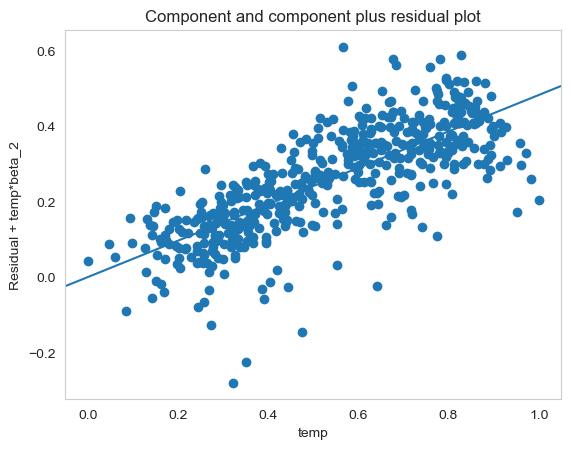

In [119]:
# Confirming linear relationship 
sm.graphics.plot_ccpr(lm, 'temp')
plt.show()

###### The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables. As we can see the relationship between the independent variables and the response variable is linear.

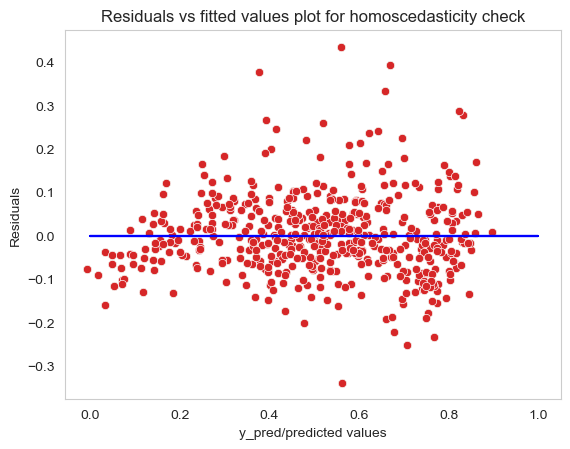

In [123]:
# Confirming linear Homoscedasticity
p = sns.scatterplot(y_train_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

###### Homoscedasticity is present since the variance of the residuals are almost constant.

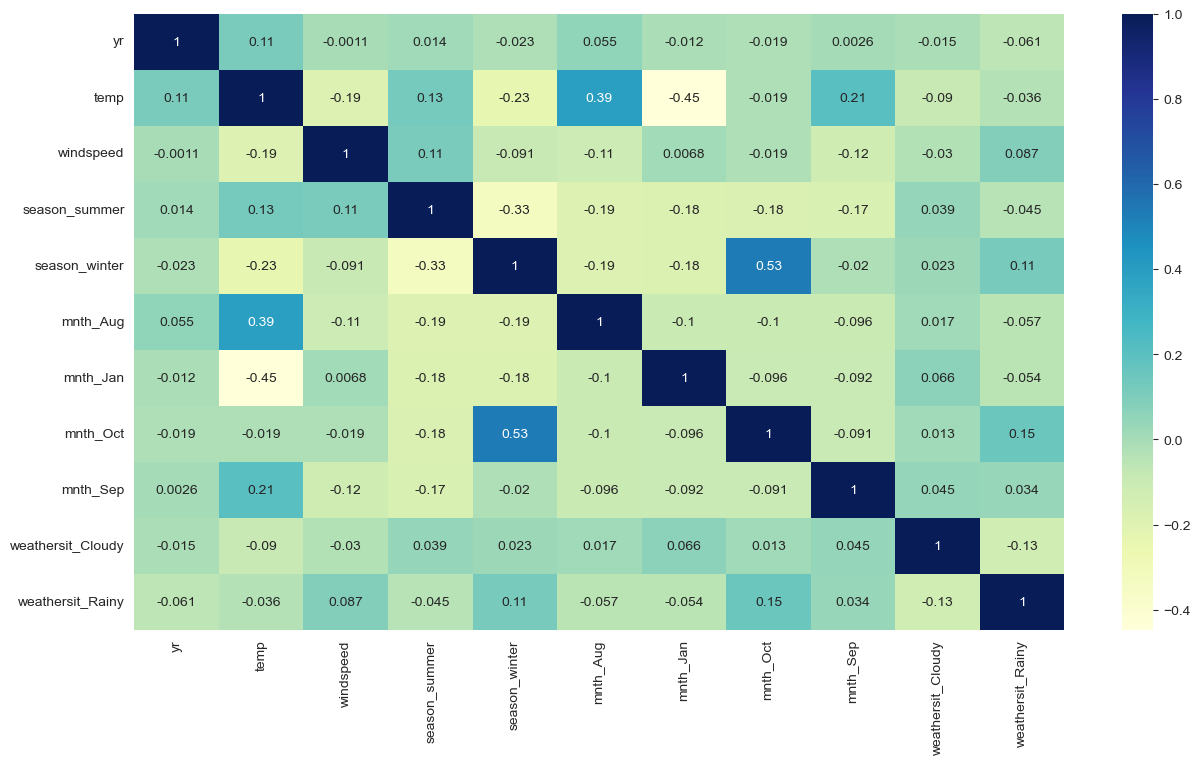

In [124]:
# Confirming Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_const.drop('const',axis=1).corr(),annot=True, cmap='YlGnBu')
plt.show()

###### As you can see independent variables are not highly correlated with each other.

In [125]:
print('The Durbin-Watson value for Final Model is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model is 1.9896


###### The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation. In this case it is extremely close to 2 which indicates non-autocorrelation

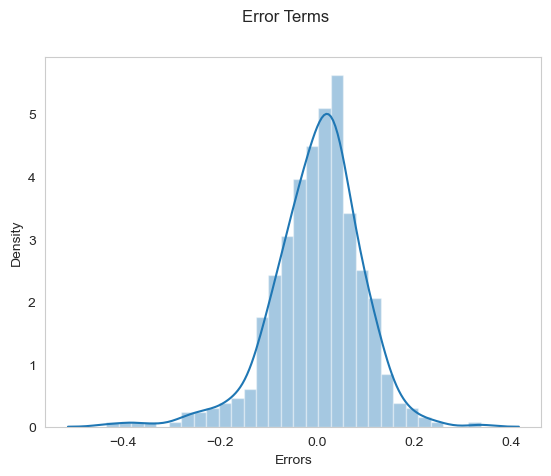

In [126]:
# Checking for normal distribution of residuals
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

### Making predictions on test data

In [127]:
# Prepraring test X and Y sets
y_test = df_test.pop('cnt')
X_test = df_test[X_train_const.columns.drop('const')]
# First 5 rows of X_test
X_test.head()

,yr,temp,windspeed,season_summer,season_winter,mnth_Aug,mnth_Jan,mnth_Oct,mnth_Sep,weathersit_Cloudy,weathersit_Rainy
184,0,0.831783,0.084226,0,0,0,0,0,0,1,0
535,1,0.901380,0.153725,1,0,0,0,0,0,0,0
299,0,0.511974,0.334210,0,1,0,0,1,0,1,0
221,0,0.881625,0.339569,0,0,1,0,0,0,0,0
152,0,0.817256,0.537413,1,0,0,0,0,0,0,0


In [128]:
X_test_const = sm.add_constant(X_test)
y_test_pred = lm.predict(X_test_const)

from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7953761282754428

In [129]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'Errors')

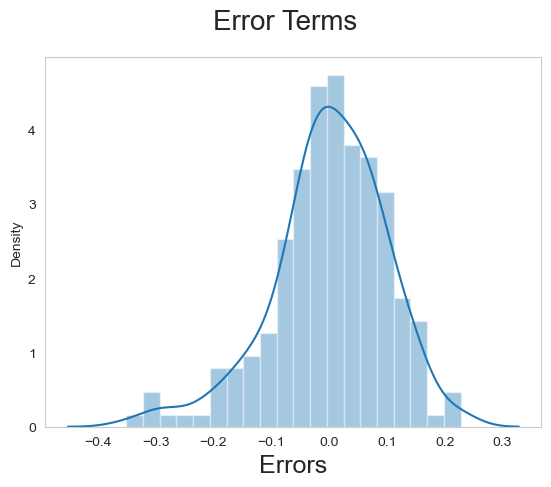

In [130]:
plt.show()

### Evaluating the model

In [131]:
print('The R-Squared score is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error is',mean_absolute_error(y_test, y_test_pred))

The R-Squared score is 0.8
The Root Mean Squared Error is 0.0986
The Mean Absolute Error is 0.07462000225873272


###### Final Model equation:

cnt = 0.1580 + yr * 0.2341 + temp * 0.4828 + windspeed * (-0.1620) + season_summer * 0.0956 + season_winter * 0.1119 + mnth_Aug * 0.0568 + mnth_Jan * (-0.0461) + mnth_Oct * 0.0394 + weathersit_Cloudy * (-0.0809) + weathersit_Rainy * (-0.2867)

###### Business Recommendations:

- The bikes rented will be more with each passing year.
- The bikes rented are more in summer and winter season thus hosting events or advertisements will be beneficial.
- Month of August and October are the best months to rent bikes as they see most increase in bikes rented.
- Month of Jan is not the best month to rent bikes as it sees decrease in bikes rented.
- Days with low windspeed also see increase in bikes rented and are good opportunities for business.
- The bikes rented are decreased in rainy and cloudy weather.

In [135]:
print(pd.__version__)

1.4.4
